In [1]:
import seaborn as sns
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from scipy import sparse
import nltk as nltk
import cv2
import imageio
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.draw.dispersion import dispersion_plot
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import BernoulliNB
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
#                         category=DeprecationWarning)


pd.set_option('display.max_rows', None)
df = pd.read_json('./train.json')
df_test = pd.read_json('./test.json')

In [2]:
def describe_features_with_null_values(df):
    null_count = df.isnull().sum()
    null_values = null_count[null_count > 0]
    null_values = null_values.sort_values(ascending = False)
    null_perc = null_values*100/len(df)
    null = pd.DataFrame(null_values, columns = ['Null Count'])
    null['Percentage'] = round(null_perc, 2)
    return null

In [3]:
def describe_features_with_inf_values(df):
    null_count = df.isinf().sum()
    null_values = null_count[null_count > 0]
    null_values = null_values.sort_values(ascending = False)
    null_perc = null_values*100/len(df)
    null = pd.DataFrame(null_values, columns = ['Null Count'])
    null['Percentage'] = round(null_perc, 2)
    return null

In [4]:
df_null = describe_features_with_null_values(df)

In [4]:
interest_level_map = {'medium':1, 'low':0 , 'high':2}

In [5]:
df['interest_level_num'] = df['interest_level'].apply(lambda x: interest_level_map[x])

In [6]:
df_price = df['price']  
IQR = df_price.quantile(0.75)-df_price.quantile(0.25)
upper = df_price.quantile(0.75)+IQR*1.5
lower = df_price.quantile(0.25)-IQR*1.5 

df1 = df[(df['price'] <upper) & (df['price'] >lower)]

df_lat = df1['latitude']

IQR = df_lat.quantile(0.75)-df_lat.quantile(0.25)
upper = df_lat.quantile(0.75)+IQR*1.5
lower = df_lat.quantile(0.25)-IQR*1.5
 
df2 = df1[(df1['latitude']<upper) & (df1['latitude']>lower)]

df_long = df2['longitude']
 
IQR = df_long.quantile(0.75)-df_long.quantile(0.25)
upper = df_long.quantile(0.75)+IQR*1.5
lower = df_long.quantile(0.25)-IQR*1.5 
df3 = df2[(df2['longitude'] >lower) & (df2['longitude']<upper)]

df_bedrooms = df3['bedrooms']
 
IQR = df_bedrooms.quantile(0.75)-df_bedrooms.quantile(0.25)
upper = df_bedrooms.quantile(0.75)+IQR*1.5
lower = max(df_bedrooms.quantile(0.25)-IQR*1.5, 0)
 
df = df3[(df3['bedrooms'] >= lower) & (df3['bedrooms'] <= upper)]

 

In [7]:
y = df['interest_level']
df = df.drop(['building_id', 'created', 'description', 'display_address', 'manager_id','photos','street_address','features','interest_level','listing_id'],axis=1)

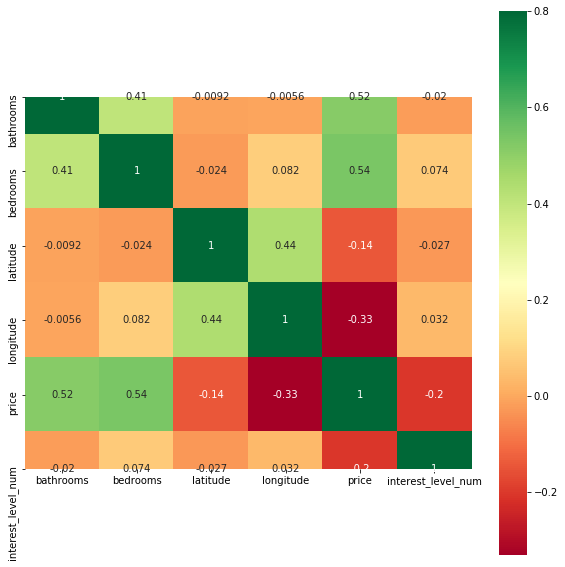

In [877]:
corrmat = df.corr()        # Finds correlation between all the columns
f, ax = plt.subplots(figsize=(10,10))             # Increases the figure size to (12, 9)

 
sns.heatmap(corrmat, vmax = 0.8, square=True, annot=True, cmap="RdYlGn");

In [878]:
print("Correlation rank : \n")
related_cols = corrmat.nlargest(20, 'interest_level_num')
print(related_cols['interest_level_num'])

Correlation rank : 

interest_level_num    1.000000
bedrooms              0.074349
longitude             0.032485
bathrooms            -0.020075
latitude             -0.027469
price                -0.202009
Name: interest_level_num, dtype: float64


## CLASSIFICATON BEFORE MODIFICATONS

## SVM

In [12]:
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
clf = SVC(gamma='auto')

# Performed 5-fold cross validation on the training dataset.
clf.fit(X_train, y_train)

scores = cross_val_score(clf, X, y, cv=5)

# Predict labels on the test data using the trained classifier.
# predictions = clf.predict(X_test)

# Calculate the F1 score by comparing predicted and actual labels.
# F1 = f1_score(y_test, predictions, average='weighted')

# calculate log loss
# y_prob = clf.predict_proba(X_test) 
# logloss = log_loss(y_test, y_prob)



# print("Average accuracy from the cross-validation:" + str(np.mean(scores)))
# # print("Model accuracy on the test dataset: " + str((logreg.score(X_test, y_test))))
# print("F1 score: " + str(F1))
# print("Log loss: " + str(logloss))

In [13]:


print("Average accuracy from the cross-validation:" + str(np.mean(scores)))
# print("Average accuracy from the cross-validation:" + str(np.mean(scores)))

Average accuracy from the cross-validation:0.966266577853933


### Logistic Regression

In [879]:
X=df

In [880]:

X = X.drop(['interest_level_num'], axis=1)
X.head()

,bathrooms,bedrooms,latitude,longitude,price
4,1.0,1,40.7108,-73.9539,2400
6,1.0,2,40.7513,-73.9722,3800
9,1.0,2,40.7575,-73.9625,3495
10,1.5,3,40.7145,-73.9425,3000
15,1.0,0,40.7439,-73.9743,2795


In [733]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
logreg = LogisticRegression(random_state=0, class_weight='balanced')

# Performed 5-fold cross validation on the training dataset.
clf = logreg.fit(X_train, y_train)
scores = cross_val_score(clf, X, y, cv=5)

# Predict labels on the test data using the trained classifier.
predictions = logreg.predict(X_test)

# Calculate the F1 score by comparing predicted and actual labels.
F1 = f1_score(y_test, predictions, average='weighted')

# calculate log loss
y_prob = logreg.predict_proba(X_test) 
logloss = log_loss(y_test, y_prob)



print("Average accuracy from the cross-validation:" + str(np.mean(scores)))
# print("Model accuracy on the test dataset: " + str((logreg.score(X_test, y_test))))
print("F1 score: " + str(F1))
print("Log loss: " + str(logloss))


Average accuracy from the cross-validation:0.6411711971920651
F1 score: 0.6033825089411788
Log loss: 0.8400218414299524


In [675]:
listingID = df_test['listing_id']
df_test.shape

listingID.head()

0    7142618
1    7210040
2    7174566
3    7191391
5    7171695
Name: listing_id, dtype: int64

In [676]:
df_test = df_test.drop(columns=['listing_id','building_id','features','description','photos', 'manager_id','created','display_address','street_address'
,'description', 'building_id', 'manager_id','created', 'display_address', 'street_address', 'photos'], axis=1) 

In [677]:
df_test.head()

,bathrooms,bedrooms,latitude,longitude,price
0,1.0,1,40.7185,-73.9865,2950
1,1.0,2,40.7278,-74.0000,2850
2,1.0,0,40.7260,-74.0026,2295
3,1.0,2,40.7321,-74.0028,2900
5,1.0,1,40.7054,-74.0095,3254


In [282]:
Xt = df_test  
 
high = [] 
low=[]
medium = []
    
for i in range(0,Xt.shape[0]): 
    h = clf.predict_proba(Xt[i:i+1])[0][0]
    l = clf.predict_proba(Xt[i:i+1])[0][1]
    m = clf.predict_proba(Xt[i:i+1])[0][2]
    
    high.append(h)
    low.append(l)
    medium.append(m)  
    

In [283]:
df_test = pd.DataFrame()  
df_test['listing_id'] = listingID 
df_test['high'] = high
df_test['medium'] = medium
df_test['low'] = low

df_test.head()


,listing_id,high,medium,low
0,7142618,0.205433,0.274571,0.519996
1,7210040,0.332345,0.352233,0.315422
2,7174566,0.220079,0.256555,0.523366
3,7191391,0.322735,0.349200,0.328064
5,7171695,0.156755,0.247355,0.595890


In [284]:
df_test.to_csv(r'C:\Users\User\Desktop\CMPT459\M3\submissionLR.csv', index = False)

## LR MODIFICATON - (1) ADDING DERIVED FEATURES

In [881]:
df = pd.read_json('./train.json')
df_test = pd.read_json('./test.json')
df["num_photos"] = df["photos"].apply(len)
df["num_features"] = df["features"].apply(len)
df["num_words"] = df["description"].apply(lambda x: len(x.split(" ")))
df["price_per_bedroom"] =df["price"]/df["bedrooms"]
df['photo_word'] = df['num_photos'] * df['num_words']
df['price_per_feature'] = df['price'] / df['num_features']
df['price_per_feature'] = df['price_per_feature'].replace(np.inf , 0)
df["price_per_bedroom"] = df['price_per_bedroom'].replace(np.inf , 0)
df['interest_level_num'] = df['interest_level'].apply(lambda x: interest_level_map[x])

In [882]:
df_price = df['price']  
IQR = df_price.quantile(0.75)-df_price.quantile(0.25)
upper = df_price.quantile(0.75)+IQR*1.5
lower = df_price.quantile(0.25)-IQR*1.5 

df1 = df[(df['price'] <upper) & (df['price'] >lower)]

df_lat = df1['latitude']

IQR = df_lat.quantile(0.75)-df_lat.quantile(0.25)
upper = df_lat.quantile(0.75)+IQR*1.5
lower = df_lat.quantile(0.25)-IQR*1.5
 
df2 = df1[(df1['latitude']<upper) & (df1['latitude']>lower)]

df_long = df2['longitude']
 
IQR = df_long.quantile(0.75)-df_long.quantile(0.25)
upper = df_long.quantile(0.75)+IQR*1.5
lower = df_long.quantile(0.25)-IQR*1.5 
df3 = df2[(df2['longitude'] >lower) & (df2['longitude']<upper)]

df_bedrooms = df3['bedrooms']
 
IQR = df_bedrooms.quantile(0.75)-df_bedrooms.quantile(0.25)
upper = df_bedrooms.quantile(0.75)+IQR*1.5
lower = max(df_bedrooms.quantile(0.25)-IQR*1.5, 0)
 
df = df3[(df3['bedrooms'] >= lower) & (df3['bedrooms'] <= upper)]

 

In [80]:
# ids = np.append(df['manager_id'].values , df_test['manager_id'].values , 0) 

In [883]:
df = df.drop(['listing_id'], axis=1)

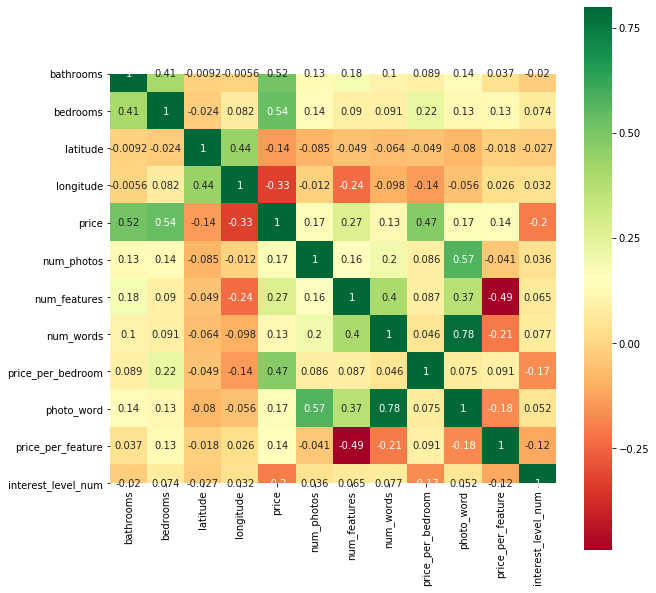

In [884]:
corrmat = df.corr()        # Finds correlation between all the columns
f, ax = plt.subplots(figsize=(10,10))             # Increases the figure size to (12, 9)

 
sns.heatmap(corrmat, vmax = 0.8, square=True, annot=True, cmap="RdYlGn");

In [885]:
print("Correlation rank : \n")
related_cols = corrmat.nlargest(20, 'interest_level_num')
print(related_cols['interest_level_num'])

Correlation rank : 

interest_level_num    1.000000
num_words             0.076835
bedrooms              0.074349
num_features          0.065385
photo_word            0.052294
num_photos            0.035740
longitude             0.032485
bathrooms            -0.020075
latitude             -0.027469
price_per_feature    -0.117991
price_per_bedroom    -0.171526
price                -0.202009
Name: interest_level_num, dtype: float64


In [886]:
df = df.drop(['created','description','display_address','features','manager_id','photos','building_id'], axis=1)

In [887]:
df = df.drop(['street_address'], axis=1)

In [685]:
df.head()

,bathrooms,bedrooms,latitude,longitude,price,interest_level,num_photos,num_features,num_words,price_per_bedroom,photo_word,price_per_feature,interest_level_num
4,1.0,1,40.7108,-73.9539,2400,medium,12,7,77,2400.0,924,342.857143,1
6,1.0,2,40.7513,-73.9722,3800,low,6,6,131,1900.0,786,633.333333,0
9,1.0,2,40.7575,-73.9625,3495,medium,6,6,119,1747.5,714,582.500000,1
10,1.5,3,40.7145,-73.9425,3000,medium,5,0,95,1000.0,475,0.000000,1
15,1.0,0,40.7439,-73.9743,2795,low,4,4,41,0.0,164,698.750000,0


In [888]:
df = df.drop(['interest_level_num','interest_level'], axis=1)

In [889]:
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


In [688]:

logreg = LogisticRegression(random_state=0, class_weight='balanced')

# Performed 5-fold cross validation on the training dataset.
clf = logreg.fit(X_train, y_train)
scores = cross_val_score(clf, X, y, cv=5)

# Predict labels on the test data using the trained classifier.
predictions = logreg.predict(X_test)

# Calculate the F1 score by comparing predicted and actual labels.
F1 = f1_score(y_test, predictions, average='weighted')

# calculate log loss
y_prob = logreg.predict_proba(X_test) 
logloss = log_loss(y_test, y_prob)



print("Average accuracy from the cross-validation:" + str(np.mean(scores)))
# print("Model accuracy on the test dataset: " + str((logreg.score(X_test, y_test))))
print("F1 score: " + str(F1))
print("Log loss: " + str(logloss))


Average accuracy from the cross-validation:0.6567003177711546
F1 score: 0.6423649783112045
Log loss: 0.8137571788501786


In [944]:
## Generating csv for Kaggle 

df = pd.read_json('./train.json')


df_null = describe_features_with_null_values(df_test)
df_test = pd.read_json('./test.json')


listingID = df_test['listing_id']

df_test["num_photos"] = df_test["photos"].apply(len)
df_test["num_features"] = df_test["features"].apply(len)
df_test["num_words"] = df_test["description"].apply(lambda x: len(x.split(" ")))
df_test["price_per_bedroom"] =df_test["price"]/df_test["bedrooms"]
df_test['photo_word'] = df_test['num_photos'] * df_test['num_words']
df_test['price_per_feature'] = df_test['price'] / df_test['num_features']
df_test['price_per_feature'] = df_test['price_per_feature'].replace(np.inf , 0)
df_test["price_per_bedroom"] = df_test['price_per_bedroom'].replace(np.inf , 0)



df_test = df_test.drop(columns=['listing_id','building_id','features','description','photos', 'manager_id','created','display_address','street_address'
,'description', 'building_id', 'manager_id','created', 'display_address', 'street_address', 'photos'], axis=1) 

Xt = df_test  

Xt.head()
 
# high = [] 
# low=[]
# medium = []
    
# for i in range(0,Xt.shape[0]): 
#     h = clf.predict_proba(Xt[i:i+1])[0][0]
#     l = clf.predict_proba(Xt[i:i+1])[0][1]
#     m = clf.predict_proba(Xt[i:i+1])[0][2]
    
#     high.append(h)
#     low.append(l)
#     medium.append(m)  
    


,bathrooms,bedrooms,latitude,longitude,price,num_photos,num_features,num_words,price_per_bedroom,photo_word,price_per_feature
0,1.0,1,40.7185,-73.9865,2950,8,6,78,2950.0,624,491.666667
1,1.0,2,40.7278,-74.0000,2850,3,3,35,1425.0,105,950.000000
2,1.0,0,40.7260,-74.0026,2295,1,3,39,0.0,39,765.000000
3,1.0,2,40.7321,-74.0028,2900,4,3,22,1450.0,88,966.666667
5,1.0,1,40.7054,-74.0095,3254,6,10,85,3254.0,510,325.400000


In [ ]:
df_test = pd.DataFrame()  
df_test['listing_id'] = listingID 
df_test['high'] = high
df_test['medium'] = medium
df_test['low'] = low

df_test.head()



In [521]:
df_test.to_csv(r'C:\Users\User\Desktop\CMPT459\M3\submissionLR_additionalAttributes.csv', index = False)

## Adding manager skills attribute

In [977]:

pd.set_option('display.max_rows', None)
df = pd.read_json('./train.json')
df_test = pd.read_json('./test.json')

df_null = describe_features_with_null_values(df)
interest_level_map = {'medium':1, 'low':0 , 'high':2}
df['interest_level_num'] = df['interest_level'].apply(lambda x: interest_level_map[x])


df["num_photos"] = df["photos"].apply(len)
df["num_features"] = df["features"].apply(len)
df["num_words"] = df["description"].apply(lambda x: len(x.split(" ")))
df["price_per_bedroom"] =df["price"]/df["bedrooms"]
df['photo_word'] = df['num_photos'] * df['num_words']
df['price_per_feature'] = df['price'] / df['num_features']
df['price_per_feature'] = df['price_per_feature'].replace(np.inf , 0)
df["price_per_bedroom"] = df['price_per_bedroom'].replace(np.inf , 0)

In [978]:

ids = np.append(df['manager_id'].values , df_test['manager_id'].values , 0) 
 
from sklearn import preprocessing


lbl = preprocessing.LabelEncoder()
lbl.fit(list(ids))
df['manager_id'] = lbl.transform(list(df['manager_id'].values))

In [979]:
print("Features which most affects to interest level : \n")
related_cols = corrmat.nlargest(20, 'interest_level_num')
print(related_cols['interest_level_num'])

Features which most affects to interest level : 

interest_level_num    1.000000
num_words             0.051164
num_photos            0.029642
photo_word            0.029165
bedrooms              0.027293
num_features          0.025540
latitude              0.004804
manager_id           -0.002382
longitude            -0.004752
price                -0.023783
listing_id           -0.026487
price_per_bedroom    -0.027060
price_per_feature    -0.030790
bathrooms            -0.082573
Name: interest_level_num, dtype: float64


In [980]:
features_to_use=['interest_level_num','manager_id',"bathrooms", "bedrooms", "latitude", "longitude", "price","num_photos", "num_features", "num_words","photo_word",'price_per_feature','price_per_bedroom']
df_price = df['price']  
IQR = df_price.quantile(0.75)-df_price.quantile(0.25)
upper = df_price.quantile(0.75)+IQR*1.5
lower = df_price.quantile(0.25)-IQR*1.5 

df1 = df[(df['price'] <upper) & (df['price'] >lower)]

df_lat = df1['latitude']

IQR = df_lat.quantile(0.75)-df_lat.quantile(0.25)
upper = df_lat.quantile(0.75)+IQR*1.5
lower = df_lat.quantile(0.25)-IQR*1.5
 
df2 = df1[(df1['latitude']<upper) & (df1['latitude']>lower)]

df_long = df2['longitude']
 
IQR = df_long.quantile(0.75)-df_long.quantile(0.25)
upper = df_long.quantile(0.75)+IQR*1.5
lower = df_long.quantile(0.25)-IQR*1.5 
df3 = df2[(df2['longitude'] >lower) & (df2['longitude']<upper)]

df_bedrooms = df3['bedrooms']
 
IQR = df_bedrooms.quantile(0.75)-df_bedrooms.quantile(0.25)
upper = df_bedrooms.quantile(0.75)+IQR*1.5
lower = max(df_bedrooms.quantile(0.25)-IQR*1.5, 0)
 
df = df3[(df3['bedrooms'] >= lower) & (df3['bedrooms'] <= upper)]


In [981]:
y = df["interest_level"] 
X = df[features_to_use]


In [779]:
X.head()

,interest_level_num,manager_id,bathrooms,bedrooms,latitude,longitude,price,num_photos,num_features,num_words,photo_word,price_per_feature,price_per_bedroom
4,1,2767,1.0,1,40.7108,-73.9539,2400,12,7,77,924,342.857143,2400.0
6,0,2565,1.0,2,40.7513,-73.9722,3800,6,6,131,786,633.333333,1900.0
9,1,3458,1.0,2,40.7575,-73.9625,3495,6,6,119,714,582.500000,1747.5
10,1,1568,1.5,3,40.7145,-73.9425,3000,5,0,95,475,0.000000,1000.0
15,0,790,1.0,0,40.7439,-73.9743,2795,4,4,41,164,698.750000,0.0


In [982]:

temp = pd.concat([X.manager_id,pd.get_dummies(y)], axis = 1).groupby('manager_id').mean()
temp.columns = ['high_interest_percent','low_interest_percent', 'medium_interest_percent']
temp['count'] = X.groupby('manager_id').count().iloc[:,1]
print(temp.head(5))

            high_interest_percent  low_interest_percent  \
manager_id                                                
0                             0.0              0.333333   
1                             0.0              1.000000   
3                             0.0              0.000000   
4                             0.0              0.666667   
5                             0.0              1.000000   

            medium_interest_percent  count  
manager_id                                  
0                          0.666667     12  
1                          0.000000     10  
3                          1.000000      2  
4                          0.333333      3  
5                          0.000000      2  


In [983]:

temp['manager_skill'] =  temp['high_interest_percent'] +  0.5 * temp['medium_interest_percent'] - temp['low_interest_percent']

In [984]:

X = X.merge(temp.reset_index(),how='left', left_on='manager_id', right_on='manager_id')
X.head()

,interest_level_num,manager_id,bathrooms,bedrooms,latitude,longitude,price,num_photos,num_features,num_words,photo_word,price_per_feature,price_per_bedroom,high_interest_percent,low_interest_percent,medium_interest_percent,count,manager_skill
0,1,2767,1.0,1,40.7108,-73.9539,2400,12,7,77,924,342.857143,2400.0,0.000000,0.603774,0.396226,53,-0.405660
1,0,2565,1.0,2,40.7513,-73.9722,3800,6,6,131,786,633.333333,1900.0,0.040000,0.360000,0.600000,25,-0.020000
2,1,3458,1.0,2,40.7575,-73.9625,3495,6,6,119,714,582.500000,1747.5,0.033333,0.755556,0.211111,90,-0.616667
3,1,1568,1.5,3,40.7145,-73.9425,3000,5,0,95,475,0.000000,1000.0,0.000000,0.744186,0.255814,86,-0.616279
4,0,790,1.0,0,40.7439,-73.9743,2795,4,4,41,164,698.750000,0.0,0.000000,0.884615,0.115385,52,-0.826923


In [985]:

X = X.drop(['manager_id', 'high_interest_percent', 'medium_interest_percent', 'count','low_interest_percent'], axis=1)

In [986]:
X = X.drop('interest_level_num', axis=1)

In [987]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


logreg = LogisticRegression(random_state=0, class_weight='balanced')

# Performed 5-fold cross validation on the training dataset.
clf = logreg.fit(X_train, y_train)
scores = cross_val_score(clf, X, y, cv=5)

# Predict labels on the test data using the trained classifier.
predictions = logreg.predict(X_test)

# Calculate the F1 score by comparing predicted and actual labels.
F1 = f1_score(y_test, predictions, average='weighted')

# calculate log loss
y_prob = logreg.predict_proba(X_test) 
logloss = log_loss(y_test, y_prob)



print("Average accuracy from the cross-validation:" + str(np.mean(scores)))
# print("Model accuracy on the test dataset: " + str((logreg.score(X_test, y_test))))
print("F1 score: " + str(F1))
print("Log loss: " + str(logloss))



Average accuracy from the cross-validation:0.716733758163957
F1 score: 0.7124606055520052
Log loss: 0.6645689867991372


In [1004]:
## Generating csv for Kaggle 

df = pd.read_json('./train.json')
df_test = pd.read_json('./test.json')


pd.set_option('display.max_rows', None)
df_test = pd.read_json('./test.json')

df_null = describe_features_with_null_values(df_test)
interest_level_map = {'medium':1, 'low':0 , 'high':2} 




df_test["num_words"] = df_test["description"].apply(lambda x: len(x.split(" ")))
df_test["price_per_bedroom"] =df_test["price"]/df_test["bedrooms"]
df_test['photo_word'] = df_test['num_photos'] * df_test['num_words']
df_test['price_per_feature'] = df_test['price'] / df_test['num_features']
df_test['price_per_feature'] = df_test['price_per_feature'].replace(np.inf , 2000)
df_test["price_per_bedroom"] = df_test['price_per_bedroom'].replace(np.inf , 1000)

ids = np.append(df['manager_id'].values , df_test['manager_id'].values , 0) 
 
from sklearn import preprocessing

lbl = preprocessing.LabelEncoder()
lbl.fit(list(ids))
df_test['manager_id'] = lbl.transform(list(df_test['manager_id'].values)) 
 
temp['high_interest_percent'] = temp['high_interest_percent'].replace(np.NaN, 0.1) 

temp['medium_interest_percent'] = temp['medium_interest_percent'].replace(np.NaN, 0.2) 

temp['low_interest_percent'] = temp['low_interest_percent'].replace(np.NaN, 0.7) 

df_test['price_per_feature'] = df_test['price_per_feature'].replace(np.inf , 2000)
df_test["price_per_bedroom"] = df_test['price_per_bedroom'].replace(np.inf , 1000)

df_test['price_per_feature'] = df_test['price_per_feature'].replace(np.NaN , 2000)
df_test["price_per_bedroom"] = df_test['price_per_bedroom'].replace(np.NaN , 1000)

df_test = df_test.merge(temp['manager_skill'], how='left', left_on='manager_id', right_on='manager_id')
 


df_test = df_test.drop(columns=['listing_id','building_id','features','description','photos', 'manager_id','created','display_address','street_address'
,'description', 'building_id', 'manager_id','created', 'display_address', 'street_address', 'photos'], axis=1) 
 
  


Xt = df_test
 
Xt.head(30) 
high = [] 
low=[]
medium = []
    
    
for i in range(0,Xt.shape[0]): 
    h = clf.predict_proba(Xt[i:i+1])[0][0]
    l = clf.predict_proba(Xt[i:i+1])[0][1]
    m = clf.predict_proba(Xt[i:i+1])[0][2]
    
    high.append(h)
    low.append(l)
    medium.append(m)  
    
df_test = pd.DataFrame()  
df_test['listing_id'] = listingID 
df_test['high'] = high
df_test['medium'] = medium
df_test['low'] = low

df_test.head()
# df_test.to_csv(r'C:\Users\User\Desktop\CMPT459\M3\submissionLR_additionalAttributes2.csv', index = False)

    


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [994]:

df_test.head(20)

,bathrooms,bedrooms,latitude,longitude,price,num_photos,num_features,num_words,price_per_bedroom,photo_word,price_per_feature,manager_skill
0,1.0,1,40.7185,-73.9865,2950,8,6,78,2950.0,624,491.666667,-0.083333
1,1.0,2,40.7278,-74.0000,2850,3,3,35,1425.0,105,950.000000,-1.000000
2,1.0,0,40.7260,-74.0026,2295,1,3,39,0.0,39,765.000000,-0.509238
3,1.0,2,40.7321,-74.0028,2900,4,3,22,1450.0,88,966.666667,-0.465385
4,1.0,1,40.7054,-74.0095,3254,6,10,85,3254.0,510,325.400000,-0.282609
5,2.0,2,40.7610,-73.9983,4990,8,12,134,2495.0,1072,415.833333,-0.575472
6,3.5,4,40.7358,-73.9877,20000,15,3,9,5000.0,135,6666.666667,-0.969388
7,1.0,0,40.7814,-73.9507,2150,3,5,90,0.0,270,430.000000,0.067164
8,2.0,4,40.7216,-73.9927,6500,7,1,1,1625.0,7,6500.000000,-1.000000
9,1.0,1,40.7553,-73.9953,3365,18,3,9,3365.0,162,1121.666667,-1.000000


In [964]:
df_test = pd.DataFrame()  
df_test['listing_id'] = listingID 
df_test['high'] = high
df_test['medium'] = medium
df_test['low'] = low

df_test.head()
df_test.to_csv(r'C:\Users\User\Desktop\CMPT459\M3\submissionLR_additionalAttributes3.csv', index = False)


## LR MODIFICATON - (2) Data normalization

In [988]:
# Split labeled data into 60% training dataset and 40% test dataset

normalizer = preprocessing.Normalizer().fit(X) 
normalizer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

logreg = LogisticRegression(random_state=0)

# Performed 5-fold cross validation on the training dataset.
clf = logreg.fit(X_train, y_train)
scores = cross_val_score(clf, X, y, cv=5)

# Predict labels on the test data using the trained classifier.
predictions = logreg.predict(X_test)

# Calculate the F1 score by comparing predicted and actual labels.
F1 = f1_score(y_test, predictions, average='weighted')

# calculate log loss
y_prob = logreg.predict_proba(X_test) 
logloss = log_loss(y_test, y_prob)



print("Average accuracy from the cross-validation:" + str(np.mean(scores)))
print("Model accuracy on the test dataset: " + str((logreg.score(X_test, y_test))))
print("F1 score: " + str(F1))
print("Log loss: " + str(logloss))



Average accuracy from the cross-validation:0.7331388901591367
Model accuracy on the test dataset: 0.7395249743549278
F1 score: 0.6957967531229606
Log loss: 0.590314045895524


## LR MODIFICATON - (3) Regularization using Grid Search

In [798]:

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
grid={"C":np.logspace(7,7.3), "penalty":["l1","l2"]} 
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,y_train)

predictions = logreg_cv.predict(X_test)

# Calculate the F1 score by comparing predicted and actual labels.
F1 = f1_score(y_test, predictions, average='weighted')

# calculate log loss
y_prob = logreg_cv.predict_proba(X_test) 
logloss = log_loss(y_test, y_prob)



print("Average accuracy from the cross-validation:" + str(np.mean(scores)))
print("Model accuracy on the test dataset: " + str((logreg_cv.score(X_test, y_test))))
print("F1 score: " + str(F1))
print("Log loss: " + str(logloss))



KeyboardInterrupt: 

In [82]:
ids = np.append(df['building_id'].values , df_test['building_id'].values , 0) 

In [83]:
lbl = preprocessing.LabelEncoder()
lbl.fit(list(ids))
df['building_id'] = lbl.transform(list(df['building_id'].values))

In [71]:
ids = np.append(df['created'].values , df_test['created'].values , 0) 

In [72]:
lbl = preprocessing.LabelEncoder()
lbl.fit(list(ids))
df['created'] = lbl.transform(list(df['created'].values))

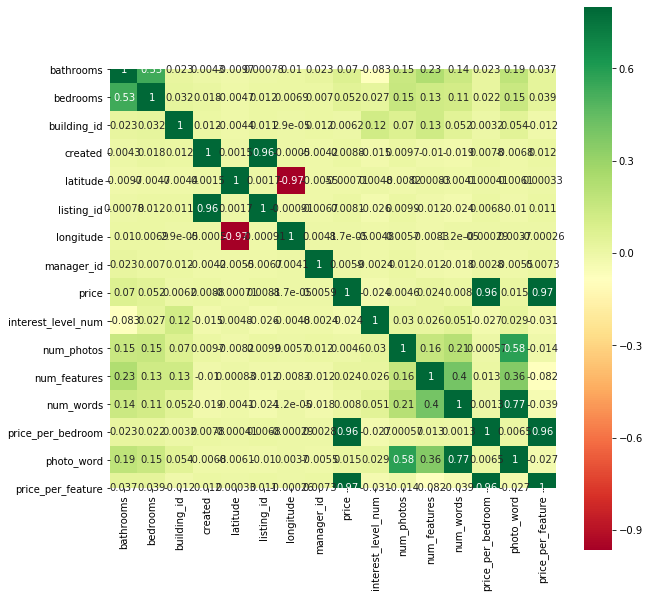

In [73]:
corrmat = df.corr()        # Finds correlation between all the columns
f, ax = plt.subplots(figsize=(10,10))             # Increases the figure size to (12, 9)

 
sns.heatmap(corrmat, vmax = 0.8, square=True, annot=True, cmap="RdYlGn");

In [43]:
print("Correlation rank : \n")
related_cols = corrmat.nlargest(20, 'interest_level_num')
print(related_cols['interest_level_num'])

Correlation rank : 

interest_level_num    1.000000
bedrooms              0.027293
latitude              0.004804
longitude            -0.004752
price                -0.023783
listing_id           -0.026487
bathrooms            -0.082573
Name: interest_level_num, dtype: float64


In [22]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,...,price,street_address,interest_level,interest_level_num,num_photos,num_features,num_words,price_per_bedroom,photo_word,price_per_feature
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,...,2400,145 Borinquen Place,medium,1,12,7,77,2400.0,924,342.857143
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,...,3800,230 East 44th,low,0,6,6,131,1900.0,786,633.333333
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,...,3495,405 East 56th Street,medium,1,6,6,119,1747.5,714,582.500000
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,...,3000,792 Metropolitan Avenue,medium,1,5,0,95,1000.0,475,0.000000
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,...,2795,340 East 34th Street,low,0,4,4,41,0.0,164,698.750000


In [540]:
temp = pd.concat([X.manager_id,pd.get_dummies(y)], axis = 1).groupby('manager_id').mean()
temp.columns = ['high_interest_percent','low_interest_percent', 'medium_interest_percent']
temp['count'] = X.groupby('manager_id').count().iloc[:,1]
print(temp.head(5))

AttributeError: 'DataFrame' object has no attribute 'manager_id'

In [115]:
temp['manager_skill'] =  temp['high_interest_percent'] +  0.5 * temp['medium_interest_percent'] - temp['low_interest_percent']

In [116]:
print(temp.head(5))

            high_interest_percent  low_interest_percent  \
manager_id                                                
0                             0.0              0.333333   
1                             0.0              1.000000   
2                             0.0              1.000000   
3                             0.0              0.000000   
4                             0.0              0.666667   

            medium_interest_percent  count  manager_skill  
manager_id                                                 
0                          0.666667     12            0.0  
1                          0.000000     10           -1.0  
2                          0.000000      1           -1.0  
3                          1.000000      2            0.5  
4                          0.333333      3           -0.5  


In [117]:
X = X.merge(temp.reset_index(),how='left', left_on='manager_id', right_on='manager_id')
X.head()

,interest_level_num,manager_id,bathrooms,bedrooms,latitude,longitude,price,num_photos,num_features,num_words,photo_word,price_per_feature,price_per_bedroom,high_interest_percent,low_interest_percent,medium_interest_percent,count,manager_skill
0,1,2767,1.0,1,40.7108,-73.9539,2400,12,7,77,924,342.857143,2400.0,0.053571,0.526786,0.419643,112,-0.263393
1,0,2565,1.0,2,40.7513,-73.9722,3800,6,6,131,786,633.333333,1900.0,0.038462,0.346154,0.615385,26,0.000000
2,1,3458,1.0,2,40.7575,-73.9625,3495,6,6,119,714,582.500000,1747.5,0.032258,0.763441,0.204301,93,-0.629032
3,1,1568,1.5,3,40.7145,-73.9425,3000,5,0,95,475,0.000000,1000.0,0.000000,0.744444,0.255556,90,-0.616667
4,0,790,1.0,0,40.7439,-73.9743,2795,4,4,41,164,698.750000,0.0,0.000000,0.854545,0.145455,55,-0.781818


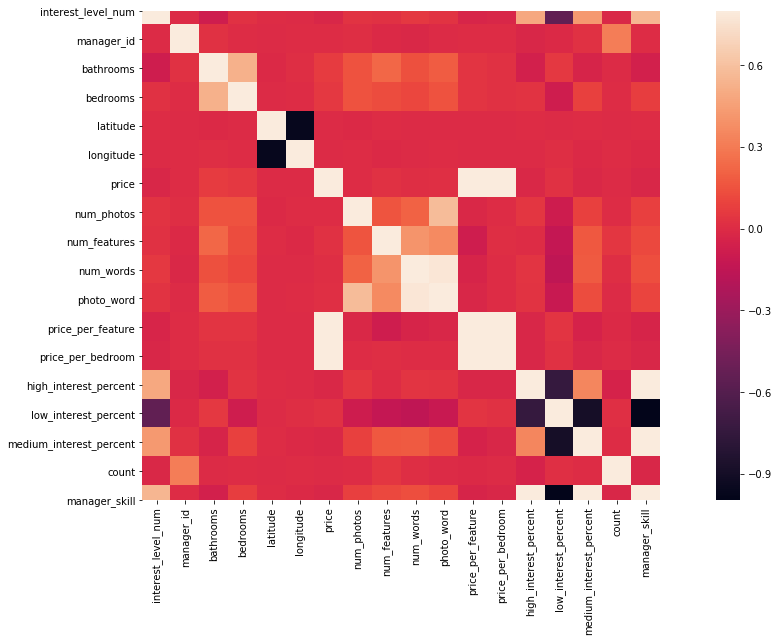

In [118]:
corrmat = X.corr()        # Finds correlation between all the columns
f, ax = plt.subplots(figsize=(20, 9))             # Increases the figure size to (12, 9)
sns.heatmap(corrmat, vmax = 0.8, square=True);

In [119]:
print("Features which most affects to interest level : \n")
related_cols = corrmat.nlargest(20, 'interest_level_num')
print(related_cols['interest_level_num'])

Features which most affects to interest level : 

interest_level_num         1.000000
manager_skill              0.553621
high_interest_percent      0.488923
medium_interest_percent    0.425192
num_words                  0.051164
num_photos                 0.029642
photo_word                 0.029165
bedrooms                   0.027293
num_features               0.025540
latitude                   0.004804
manager_id                -0.002382
longitude                 -0.004752
count                     -0.015222
price                     -0.023783
price_per_bedroom         -0.027060
price_per_feature         -0.030790
bathrooms                 -0.082573
low_interest_percent      -0.543470
Name: interest_level_num, dtype: float64


In [21]:
features_to_use=["bathrooms", "bedrooms", "latitude", "longitude", "price","num_photos", "num_features", "num_words","photo_word",'price_per_feature','price_per_bedroom', 'manager_skill']

In [22]:
X = X[features_to_use]

In [23]:
X.head(5)

,bathrooms,bedrooms,latitude,longitude,price,num_photos,num_features,num_words,photo_word,price_per_feature,price_per_bedroom,manager_skill
0,1.5,3,40.7145,-73.9425,3000,5,0,95,475,0.0,1000.0,-0.616667
1,1.0,2,40.7947,-73.9667,5465,11,5,9,99,1093.0,2732.5,-0.982558
2,1.0,1,40.7388,-74.0018,2850,8,4,94,752,712.5,2850.0,-0.332090
3,1.0,1,40.7539,-73.9677,3275,3,2,80,240,1637.5,3275.0,-0.675393
4,1.0,4,40.8241,-73.9493,3350,3,1,68,204,3350.0,837.5,-1.000000


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [25]:
X.head(5)

,bathrooms,bedrooms,latitude,longitude,price,num_photos,num_features,num_words,photo_word,price_per_feature,price_per_bedroom,manager_skill
0,1.5,3,40.7145,-73.9425,3000,5,0,95,475,0.0,1000.0,-0.616667
1,1.0,2,40.7947,-73.9667,5465,11,5,9,99,1093.0,2732.5,-0.982558
2,1.0,1,40.7388,-74.0018,2850,8,4,94,752,712.5,2850.0,-0.332090
3,1.0,1,40.7539,-73.9677,3275,3,2,80,240,1637.5,3275.0,-0.675393
4,1.0,4,40.8241,-73.9493,3350,3,1,68,204,3350.0,837.5,-1.000000


In [26]:
clf = RandomForestClassifier(n_estimators=300)

In [27]:
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
y_prob = clf.predict_proba(X_test) 
log_loss(Y_test,y_prob)

0.578302846190771

In [29]:
clf.score(X_test, Y_test)

0.7513170336350128

# This is the part to generate output for kaggle

In [30]:
temp.head(4)

,high_interest_percent,low_interest_percent,medium_interest_percent,count,manager_skill
manager_id,,,,,
0,0.0,0.333333,0.666667,12,0.0
1,0.0,1.000000,0.000000,10,-1.0
2,0.0,1.000000,0.000000,1,-1.0
3,0.0,0.000000,1.000000,2,0.5


In [31]:
df_test = pd.read_json('./test.json')

In [32]:
describe_features_with_null_values(df_test)

,Null Count,Percentage


In [33]:
df_test["num_photos"] = df_test["photos"].apply(len)
df_test["num_features"] = df_test["features"].apply(len)
df_test["num_words"] = df_test["description"].apply(lambda x: len(x.split(" ")))
df_test["price_per_bedroom"] =df_test["price"]/df_test["bedrooms"]
df_test['photo_word'] = df_test['num_photos'] * df_test['num_words']
df_test['price_per_feature'] = df_test['price'] / df_test['num_features']
df_test['price_per_feature'] = df_test['price_per_feature'].replace(np.inf , 0)
df_test["price_per_bedroom"] = df_test['price_per_bedroom'].replace(np.inf , 0)

In [34]:
df_test.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,num_photos,num_features,num_words,price_per_bedroom,photo_word,price_per_feature
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street,8,6,78,2950.0,624,491.666667
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street,3,3,35,1425.0,105,950.000000
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",40.7306,7103890,-73.9890,9ca6f3baa475c37a3b3521a394d65467,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street,6,3,333,3758.0,1998,1252.666667
1000,1.0,2,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11 06:17:35,Step into this fantastic new Construction in t...,South Third Street\r,"[Roof Deck, Balcony, Elevator, Laundry in Buil...",40.7109,7143442,-73.9571,0b9d5db96db8472d7aeb67c67338c4d2,[https://photos.renthop.com/2/7143442_0879e9e0...,3300,251 South Third Street\r,6,10,204,1650.0,1224,330.000000
100000,2.0,2,6134e7c4dd1a98d9aee36623c9872b49,2016-04-12 05:24:17,"~Take a stroll in Central Park, enjoy the ente...","Midtown West, 8th Ave","[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.7650,6860601,-73.9845,b5eda0eb31b042ce2124fd9e9fcfce2f,[https://photos.renthop.com/2/6860601_c96164d8...,4900,260 West 54th Street,7,14,174,2450.0,1218,350.000000


In [35]:
df_test['manager_id'] = lbl.transform(list(df_test['manager_id'].values))

In [36]:
df_test.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,manager_id,price,num_photos,num_features,num_words,price_per_bedroom,photo_word,price_per_feature
count,74659.000000,74659.000000,74659.000000,7.465900e+04,74659.000000,74659.000000,7.465900e+04,74659.000000,74659.000000,74659.000000,7.465900e+04,74659.000000,74659.000000
mean,1.212915,1.544663,40.735060,7.024001e+06,-73.945282,2254.239395,3.749033e+03,5.620193,5.423593,90.093050,1.943397e+03,552.857860,937.808315
std,0.649820,1.107014,0.806687,1.264496e+05,1.487795,1264.884083,9.713092e+03,3.641383,3.917167,60.771831,7.742781e+03,560.978663,2715.647803
min,0.000000,0.000000,0.000000,6.811958e+06,-121.488000,0.000000,1.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,1.000000,1.000000,40.727800,6.915516e+06,-73.991800,1142.000000,2.495000e+03,4.000000,2.000000,50.000000,1.100000e+03,204.000000,381.937500
50%,1.000000,1.000000,40.751600,7.021738e+06,-73.977700,2238.000000,3.150000e+03,5.000000,5.000000,83.000000,1.725000e+03,420.000000,647.375000
75%,1.000000,2.000000,40.774300,7.129166e+06,-73.954700,3438.000000,4.100000e+03,7.000000,8.000000,119.000000,2.700000e+03,738.000000,1120.000000
max,112.000000,7.000000,42.872700,7.761779e+06,0.000000,4398.000000,1.675000e+06,50.000000,36.000000,2837.000000,1.070000e+06,21590.000000,418750.000000


In [37]:
df_joined = df_test.join(other = temp , on = 'manager_id', how = 'left')

In [38]:
describe_features_with_null_values(df_joined)

,Null Count,Percentage
manager_skill,1474,1.97
count,1474,1.97
medium_interest_percent,1474,1.97
low_interest_percent,1474,1.97
high_interest_percent,1474,1.97


In [39]:
df_joined['low_interest_percent'].replace(np.NaN , 0.7 , True)
df_joined['medium_interest_percent'].replace(np.NaN , 0.2 , True)
df_joined['high_interest_percent'].replace(np.NaN , 0.1, True)

In [40]:
features_to_use=["bathrooms", "bedrooms", "latitude", "longitude", "price","num_photos", "num_features", "num_words","photo_word",'price_per_feature','price_per_bedroom' , 'manager_skill']

In [41]:
describe_features_with_null_values(df_joined)

,Null Count,Percentage
manager_skill,1474,1.97
count,1474,1.97


In [42]:
df_joined['manager_skill'] =  df_joined['high_interest_percent'] +0.5* df_joined['medium_interest_percent'] - df_joined['low_interest_percent']

In [43]:
test_prob = clf.predict_proba(df_joined[features_to_use])

In [44]:

high = []
low = []
med = []

In [45]:
listing_id = df_joined.listing_id

In [46]:
for pred in test_prob:
    high.append( pred[0])
    low.append (pred[1])
    med.append( pred[2])

In [47]:
sub = pd.DataFrame({'listing_id':listing_id , 'high':high,'medium':med,'low':low}).reset_index()

In [48]:
sub = sub.drop('index' ,axis = 1)

In [49]:
sub.head(5)

,listing_id,high,medium,low
0,7142618,0.191333,0.540611,0.268056
1,7210040,0.016667,0.020000,0.963333
2,7103890,0.033333,0.606198,0.360468
3,7143442,0.214611,0.448444,0.336944
4,6860601,0.020000,0.245000,0.735000


In [50]:
sub.to_csv('./submission.csv' , index = False)